<a href="https://colab.research.google.com/github/DeepthiManthapuram/MachineLearning-Algorithms/blob/main/Divisive_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


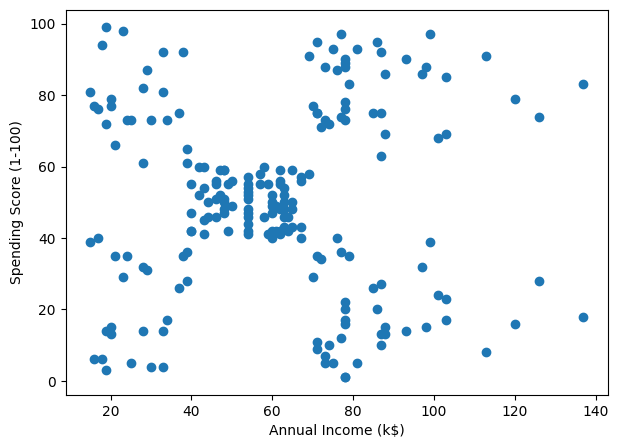

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize = (7, 5))
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [11]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.3, min_samples = 5)
clusters = dbscan.fit_predict(x_scaled)

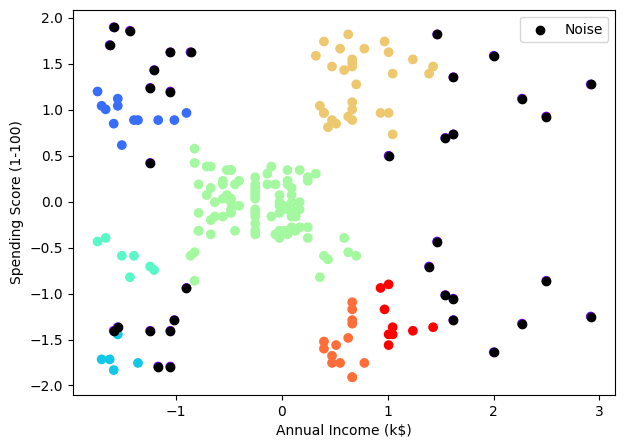

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize = (7, 5))

plt.scatter(x[:, 0], x[:, 1], c=clusters, cmap = 'rainbow')
plt.scatter(x[clusters == -1, 0], x[clusters == -1, 1], color= 'black', label = 'Noise')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [21]:
#evaluation metric - shilloute score

from sklearn.metrics import silhouette_score

score = silhouette_score(x, clusters)
print("silhouette score for DBSCAN clustering:", score)

silhouette score for DBSCAN clustering: 0.31614121976731185


In [25]:
eps_value = [0.2, 0.3, 0.5]

for eps in eps_value:
  print(f"\n Evaluating DBSCAN using eps = {eps}")

  #apply DBSCAN
  dbscan = DBSCAN(eps = eps, min_samples = 5)
  labels = dbscan.fit_predict(x_scaled)

  #no of clusters(ignore noise label -1)
  unique_labels = set(labels)
  n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

  #no of noise points
  n_noise = list(labels).count(-1)
  noise_ratio = n_noise/len(labels)

  print(f"no of clusters: {n_clusters}")
  print("no of noise points: ", round(noise_ratio, 2))


  #silhouette score (only if valid)
  if n_clusters > 1:
    score = silhouette_score(x_scaled, labels)
    print(f"silhouette score: {score}")
  else:
    print("silhouette score: Not applicable (less than 2 clusters)")


 Evaluating DBSCAN using eps = 0.2
no of clusters: 7
no of noise points:  0.39
silhouette score: 0.1405794267961756

 Evaluating DBSCAN using eps = 0.3
no of clusters: 7
no of noise points:  0.17
silhouette score: 0.31614121976731185

 Evaluating DBSCAN using eps = 0.5
no of clusters: 2
no of noise points:  0.04
silhouette score: 0.35044619989666004
